In [30]:
import json
import requests
from config import api_key
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
from random import uniform
import datetime


In [31]:
def newpoint():
   return uniform(-180,180), uniform(-90, 90)

coord = (newpoint() for x in range(5000))

coordinates=[]
for coord in coord:
    coordinates.append(coord)
    
cities_original=[]
for coordinate_pair in coordinates:
    lat, lon= coordinate_pair
    cities_original.append(citipy.nearest_city(lat, lon).city_name)
    
cities=set(cities_original)
print(f'Numbers of unique cities used for data retrieving is {len(cities)}')


Numbers of unique cities used for data retrieving is 909


In [32]:
url='http://api.openweathermap.org/data/2.5/weather?'

unit='imperial'

query_url=f'{url}&appid={api_key}&unit={unit}&q='

lat=[]
long=[]
temp_max=[]
hum=[]
cld=[]
wind=[]
cit=[]
country=[]
date=[]
nums= 1

print('Beginning Data retrieval')
print('------------------------')
for city in cities:
    response_json=requests.get(query_url+city).json()
    if str(response_json['cod'])=='404':
        print(f'Missing data city no. {nums} of {len(cities)}|Skipped {city}')
        nums=nums + 1
    if str(response_json['cod'])!='404':
        try:
            cit.append(city)
            lat.append(response_json['coord']['lat'])
            print(f'Retrieve data city no. {nums} of {len(cities)}|Added {city}')
            nums=nums+1
        except:
            print('NA')
        try:
            long.append(response_json['coord']['lon'])
        except:
            print('NA')
        try:
            temp_max.append(response_json['main']['temp_max'])
        except:
            print('NA0')
        try:
            hum.append(response_json['main']['humidity'])
        except:
            print('NA1')
        try:
            cld.append(response_json['clouds']['all'])
        except:
            print('NA2')
        try:
            wind.append(response_json['wind']['speed'])
        except:
            print('NA3')
        try:
            country.append(response_json['sys']['country'])
        except:
            print('NA4')
        try:
            date.append(response_json['dt'])
        except:
            print('NA5')
print('----------------------')
print('End of Data retrieval')

Beginning Data retrieval
------------------------
Retrieve data city no. 1 of 909|Added saint-denis
Retrieve data city no. 2 of 909|Added suez
Retrieve data city no. 3 of 909|Added karasburg
Missing data city no. 4 of 909|Skipped camana
Retrieve data city no. 5 of 909|Added adrar
Retrieve data city no. 6 of 909|Added laguna
Missing data city no. 7 of 909|Skipped kyle of lochalsh
Retrieve data city no. 8 of 909|Added farah
Missing data city no. 9 of 909|Skipped severnyy
Missing data city no. 10 of 909|Skipped saryshagan
Retrieve data city no. 11 of 909|Added gelemso
Missing data city no. 12 of 909|Skipped suluktu
Retrieve data city no. 13 of 909|Added inta
Retrieve data city no. 14 of 909|Added kipushi
Missing data city no. 15 of 909|Skipped garm
Retrieve data city no. 16 of 909|Added batticaloa
Missing data city no. 17 of 909|Skipped saint-fabien
Retrieve data city no. 18 of 909|Added mouila
Missing data city no. 19 of 909|Skipped doctor pedro p. pena
Retrieve data city no. 20 of 909|A

In [33]:
weather_data=pd.DataFrame()
weather_dict={
    'City': cit,
    'Latitude': lat,
    'Longitude': long,
    'Max Temperature': temp_max,
    'Humidity': hum,
    'Cloudiness': cld,
    'Wind Speed': wind,
    'City Country': country,
    'City Date': date
}

weather_data=pd.DataFrame(weather_dict)

temp_max_celcus=[]
for temp in weather_data['Max Temperature']:
    new_temp= (int(temp)-273.15)*9/5+32
    temp_max_celcus.append(new_temp)
    

weather_dict_final={
    'City': cit,
    'Latitude': lat,
    'Longitude': long,
    'Max Temperature in Celsus': temp_max_celcus,
    'Humidity': hum,
    'Cloudiness': cld,
    'Wind Speed': wind,
    'City Country': country,
    'City Date': date
}

weather_data_final=pd.DataFrame(weather_dict_final)

weather_data.to_csv('PyWeatherTable.csv',index=False)

weather_data_final



,City,Latitude,Longitude,Max Temperature in Celsus,Humidity,Cloudiness,Wind Speed,City Country,City Date
0,saint-denis,48.94,2.36,62.33,55,0,1.50,FR,1567461072
1,suez,29.97,32.54,74.93,78,0,5.05,EG,1567461072
2,karasburg,-28.01,18.75,58.73,10,3,4.93,NA,1567461073
3,adrar,27.87,-0.29,96.53,18,0,5.70,DZ,1567461074
4,laguna,16.17,-88.94,91.13,59,40,3.10,BZ,1567461075
...,...,...,...,...,...,...,...,...,...
801,geraldton,49.72,-86.95,53.33,46,20,3.60,CA,1567461585
802,kashan,33.99,51.44,56.93,24,0,1.53,IR,1567461585
803,bolobo,-2.17,16.23,80.33,66,14,1.47,CD,1567461586
804,ayna,38.55,-2.07,69.53,73,0,3.10,ES,1567461586


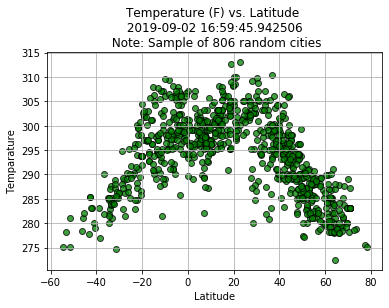

In [34]:
total_cities=len(weather_data['City'])
timestamp=datetime.datetime.today()

plt.figure(0)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Max Temperature'],c='green', edgecolor='Black', alpha=0.75,
           marker='o')
timestamp=datetime.datetime.today()
plt.title(f'Temperature (F) vs. Latitude \n {timestamp} \n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Temparature')
plt.grid()
plt.savefig('TempvsLat.png')
plt.show()

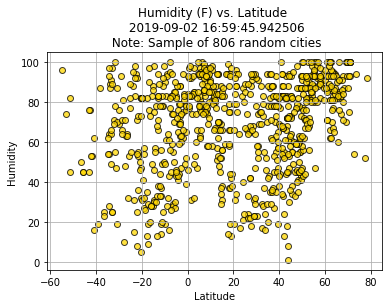

In [35]:
plt.figure(1)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Humidity'],c='gold',edgecolor='Black',alpha=0.75,
           marker='o')
plt.title(f'Humidity (F) vs. Latitude \n {timestamp}\n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('HumidvsLat.png')
plt.show()

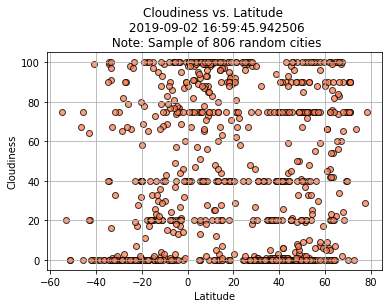

In [36]:
plt.figure(2)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Cloudiness'],c='coral',edgecolor='Black',alpha=0.75,
           marker='o')
plt.title(f'Cloudiness vs. Latitude \n {timestamp}\n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('CloudvsLat.png')
plt.show()

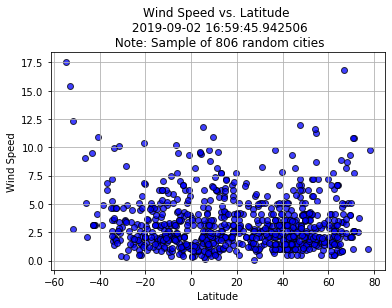

In [37]:
plt.figure(3)
plt.scatter(x=weather_data['Latitude'],y=weather_data['Wind Speed'],c='blue',edgecolor='Black',alpha=0.75,
           marker='o')
plt.title(f'Wind Speed vs. Latitude \n {timestamp}\n Note: Sample of {total_cities} random cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig('WindvsLat.png')
plt.show()